In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline
import string
# load dataset and set to a 600 columns visible limit.
data = pd.read_stata('DATA - 2020 New Zealand Election Study - STATA.dta')
pd.set_option('max_columns', 600)

# seperating currently unimportant columns, and non question columns.
new_df = data.iloc[:,6:-99]
new_df.drop(columns=['anzicpl','indcodep'], axis=1, inplace=True)

#df_list = new_df.columns.tolist()

# list of column nans in order of most to least
most_nans = new_df.isnull().sum().sort_values(ascending=False)

# making an index for this list of column nans^, that are larger than 0. seperating the nans from the non-nan columns
nans_index = most_nans > 0 
nozeros = most_nans[nans_index]

#print(most_nans)
#print(nozeros)

# making an index of nan columns that are greater than 2070
great_index = nozeros >2070
#print(new_index)

# seperating nan columns that are greater than 2070, using index above.
nans_df = nozeros[great_index]
#print(nans_df)
#---------------------------------*
# selection of the 'A' chapter answers that are less 'grouped' togethor than others and also dont have too great amount of nans to be usable currently.
#A_big_nans = df.iloc[:,13:23]
A_df = new_df[['A1','A2','A6','A8','A9','A10_1','A10_2','A10_3','A10_4','A13_1','A13_2','A13_3','A13_4','A13_5','A13_6','A13_7','A13_8','A20','A21','A22','A23']].copy()

# list of amount of nans, and in order, for selected chapter 'A'.
A_df_nans = A_df.isnull().sum().sort_values(ascending=False)
print(A_df)

#Plan: A2 value counts (eg: 2. 1971, 3. 1057) 1st plot, 2nd plot A2 ('2. fairly closely') linked with A13_6 value counts,
# 3rd plot A2 ('3. Not very closely') linked with A13_6 value counts.

                          A1                   A2  \
0     2. Somewhat interested  3. Not very closely   
1     2. Somewhat interested  3. Not very closely   
2     2. Somewhat interested        4. Not at all   
3     3. Not very interested  3. Not very closely   
4     2. Somewhat interested    2. Fairly closely   
...                      ...                  ...   
3725  2. Somewhat interested    2. Fairly closely   
3726  3. Not very interested  3. Not very closely   
3727  2. Somewhat interested    2. Fairly closely   
3728  2. Somewhat interested      1. Very closely   
3729  2. Somewhat interested    2. Fairly closely   

                                   A6              A8                     A9  \
0       4. Yes, on several occassions    2. Sometimes      1. Very confident   
1                  5. Yes, many times    2. Sometimes  2. Somewhat confident   
2               3. Yes, once or twice        4. Never  2. Somewhat confident   
3     1. Did not have internet access   5. 

In [38]:
# A13_6 rows corresponding to '2. Fairly closely' in A2, with the values counted.
A13_6_answer2 = A_df['A13_6'][(A_df['A2'] == "2. Fairly closely")]
A13_6_answer2_vc = A13_6_answer2.value_counts()

# The rows described above, but in list form (only numerics).
A13_6_answer2_vc_list = list(A13_6_answer2_vc)
print(A13_6_answer2_vc_list)

# A13_6 rows corresponding to '3. Not very closesly' in A2, with the values counted.
A13_6_answer3 = A_df['A13_6'][(A_df['A2'] == "3. Not very closely")]
A13_6_answer3_vc = A13_6_answer3.value_counts()

A13_6_answer3_vc_list = list(A13_6_answer3_vc)
print(A13_6_answer3_vc_list)

# Amount (length) of A2's responses for '2. Fairly closely'. Values counted above.
print( '->',len(A13_6_answer2))
print(A13_6_answer2_vc)
print(A13_6_answer3_vc)

# A2 values counted. and listed (only numerical)
A2_value_counts = A_df['A2'].value_counts()
A2_vals_list = list(A2_value_counts)
print(A_df['A2'].isnull().sum())
print(A2_vals_list)

# Regular expressions function for seperating string values from numerical, for later visualizations using matplotlib, seaborn or sklearn.
def regex_string(series):
    #x = re.sub('[^a-zA-Z]', '', str(series))
    strings = re.findall(r'[^0-9\.][A-Za-z\W]+ [^0-9{dtype:}]+ ',str(series))
    return(strings)

# converted string values for column A2
strings_vals_A2 = list(regex_string(A2_value_counts))
print(strings_vals_A2)

# converted string values for for column A13_6 answers corresponding to A2's '2. Fairly closesly' rows.
strings_vals_A13_6_a2 = list(regex_string(A13_6_answer2_vc))
print(strings_vals_A13_6_a2)

# converted string values for for column A13_6 answers corresponding to A2's '3. Not very closesly' rows.
strings_vals_A13_6_a3 = list(regex_string(A13_6_answer3_vc))
print(strings_vals_A13_6_a3)

[576, 467, 419, 254, 197, 26]
[310, 230, 170, 148, 129, 48]
-> 1971
2. Somewhat agree       576
4. Somewhat disagree    467
5. Strongly disagree    419
1. Strongly agree       254
3. Neither              197
6. Don't know            26
Name: A13_6, dtype: int64
2. Somewhat agree       310
4. Somewhat disagree    230
5. Strongly disagree    170
3. Neither              148
1. Strongly agree       129
6. Don't know            48
Name: A13_6, dtype: int64
29
[1971, 1057, 573, 100]
[' Fairly closely      ', ' Not very closely    ', ' Very closely         ', ' Not at all           ']
[' Somewhat agree       ', ' Somewhat disagree    ', ' Strongly disagree    ', ' Strongly agree       ', ' Neither              ', " Don't know            "]
[' Somewhat agree       ', ' Somewhat disagree    ', ' Strongly disagree    ', ' Neither              ', ' Strongly agree       ', " Don't know            "]


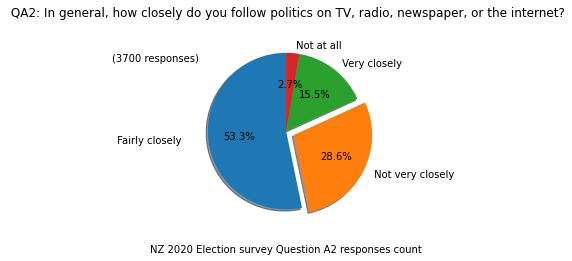

In [68]:
# A2 pie chart responses 
fig, ax = plt.subplots()
ax.axis('equal')
width = 0.3

plt.xlabel('NZ 2020 Election survey Question A2 responses count')
plt.title(' QA2: In general, how closely do you follow politics on TV, radio, newspaper, or the internet?')
plt.text(-2,0.8, '(3700 responses)')

#Outer ring
cm = plt.get_cmap("Paired")
cout = cm(np.arange(3)*4)
explode = (0, 0.1, 0, 0)
wedges, plt_labels, junk = ax.pie(A2_vals_list, radius=0.9, labels=strings_vals_A2, labeldistance=1.1,explode=explode, shadow=True, startangle=90, autopct='%1.1f%%')

plt.show()